In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        n_features = X.shape[1]
        self.criterion_list = []
        self.ig_score_list = []
        for feature in range(n_features):
            uniques = np.unique(X[:, feature])
            ig_score_iteration_list = []
            for unique in uniques:
                left_iteration = y[X[:, feature] >= unique]
                right_iteration = y[X[:, feature] < unique]
                ig_score = self._information_gain(y, left_iteration, right_iteration)
                ig_score_iteration_list.append(ig_score)
            criterion_row = np.argmax(ig_score_iteration_list)
            self.criterion_list.append(X[criterion_row, feature])
            self.ig_score_list.append(max(ig_score_iteration_list))
            if self.verbose:
                print(X[criterion_row, feature])
                print(self.ig_score_list)
        
        self.selected_feature = np.argmax(self.ig_score_list)
        self.threshold = self.criterion_list[self.selected_feature]
        X_left, X_right, y_left, y_right = self._divide(X, y, self.selected_feature, self. threshold)  
        left_number_1 = np.count_nonzero(y_left)
        left_number_0 = len(y_left) - left_number_1
        right_number_1 = np.count_nonzero(y_right)
        right_number_0 = len(y_right) - right_number_1
        if left_number_1 >= left_number_0:
            self.left_y_label = 1
        else:
            self.left_y_label = 0
        if right_number_1 >= right_number_0:
            self.right_y_label = 1
        else:
            self.right_y_label = 0
        
        return X_left, X_right, y_left, y_right
        
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        y_pred = np.zeros(X.shape[0])
        left_index = X[:, self.selected_feature] >= self.threshold
        right_index = X[:, self.selected_feature] < self.threshold
        y_pred[left_index] = self.left_y_label
        y_pred[right_index] = self.right_y_label
        
        return y_pred
    
    def _gini_score(self, y):
        labels = np.unique(y)
        sum_rate = 0
        for label in labels:
            sum_rate += (len(y[y == label])/len(labels))**2
        gini_score = 1 - sum_rate
        
        return gini_score
    
    def _information_gain(self, root, left, right):
        ig = self._gini_score(root) - len(left)/len(root)*self._gini_score(left) - len(right)*len(root)*self._gini_score(right)
        
        return ig
    
    def _divide(self, X, y, feature, threshold):
        self.left_index = np.where(X[:, feature] >= threshold)[0]
        self.right_index = np.where(X[:, feature] < threshold)[0]
        X_left = X[self.left_index]
        X_right = X[self.right_index]
        y_left = y[self.left_index]
        y_right = y[self.right_index]
        
        return X_left, X_right, y_left, y_right

# 【問題1】不純度を求める関数

class ScratchDecesionTreeClassifierDepth1()に下記コードを追加。
```python
def gini_score(self, y):
    labels = np.unique(y)
    sum_rate = 0
    for i in labels:
        sum_rate += (len(y[y == label])/len(labels))**2
    gini_score = 1 - sum_rate

    return gini_score
```

# 【問題2】情報利得を求める関数

class ScratchDecesionTreeClassifierDepth1()に下記コードを追加。
```python
    def _information_gain(self, root, left, right):
        ig = self._gini_score(root) - len(left)/len(root)*self._gini_score(left) - len(right)*len(root)*self._gini_score(right)
        
        return ig
```

# 【問題3】学習

class ScratchDecesionTreeClassifierDepth1()に下記コードを追加。
```python
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        n_features = X.shape[1]
        self.criterion_list = []
        self.ig_score_list = []
        for feature in range(n_features):
            uniques = np.unique(X[:, feature])
            ig_score_iteration_list = []
            for unique in uniques:
                left_iteration = y[X[:, feature] >= unique]
                right_iteration = y[X[:, feature] < unique]
                ig_score = self._information_gain(y, left_iteration, right_iteration)
                ig_score_iteration_list.append(ig_score)
            criterion_row = np.argmax(ig_score_iteration_list)
            self.criterion_list.append(X[criterion_row, feature])
            self.ig_score_list.append(max(ig_score_iteration_list))
            if self.verbose:
                print(X[criterion_row, feature])
                print(self.ig_score_list)
        
        self.selected_feature = np.argmax(self.ig_score_list)
        self.threshold = self.criterion_list[self.selected_feature]
        X_left, X_right, y_left, y_right = self._divide(X, y, self.selected_feature, self. threshold)  
        left_number_1 = np.count_nonzero(y_left)
        left_number_0 = len(y_left) - left_number_1
        right_number_1 = np.count_nonzero(y_right)
        right_number_0 = len(y_right) - right_number_1
        if left_number_1 >= left_number_0:
            self.left_y_label = 1
        else:
            self.left_y_label = 0
        if right_number_1 >= right_number_0:
            self.right_y_label = 1
        else:
            self.right_y_label = 0
        
        return X_left, X_right, y_left, y_right
```

# 【問題4】推定

class ScratchDecesionTreeClassifierDepth1()に下記コードを追加。
```python
def predict(self, X):
    """
    決定木分類器を使いラベルを推定する
    """
    y_pred = np.zeros(X.shape[0])
    left_index = np.where(X[:, self.selected_feature] >= self.threshold)[0]
    right_index = np.where(X[:, self.selected_feature] < self.threshold)[0]
    y_pred[left_index] = self.left_y_label
    y_pred[right_index] = self.right_y_label

    return y_pred
```

# 【問題5】学習と推定

In [4]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

## sklearnの決定木を使う

In [6]:
dtc = DecisionTreeClassifier()

In [7]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
y_pred = dtc.predict(X_val)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [9]:
accuracy_score(y_val, y_pred)

0.7

## スクラッチの決定木を使う

In [10]:
scr_dtc = ScratchDecesionTreeClassifierDepth1(True)

In [11]:
scr_dtc.fit(X_train, y_train)

-0.44699
[90586.0]
-2.8073
[90586.0, 90586.0]


(array([[-0.12243 ,  9.0162  ],
        [ 0.10645 ,  1.9242  ],
        [ 0.057313,  5.4681  ],
        [ 0.58619 ,  0.37158 ],
        [ 1.1319  ,  2.4023  ],
        [ 0.6017  ,  4.3439  ],
        [ 0.50214 , -0.31818 ],
        [ 0.59912 ,  5.3524  ],
        [ 0.96765 , 10.083   ],
        [ 0.56421 ,  0.72888 ],
        [ 0.35084 , -0.031994],
        [-0.44699 , -2.8073  ]]), array([[-2.9452 , -1.8219 ],
        [-2.353  , -0.72261],
        [-0.65259,  9.3444 ],
        [-6.6797 ,  0.67661],
        [-0.61251, -0.75345],
        [-2.9362 ,  2.5462 ],
        [-3.1625 , -3.9606 ],
        [-0.57242, -2.9915 ],
        [-3.0603 , -3.6461 ],
        [-0.60216,  8.4636 ],
        [-1.4621 , -2.4586 ],
        [-2.234  , -2.5323 ],
        [-3.1108 ,  0.15394],
        [-1.281  , 15.6824 ],
        [-4.1013 , -4.353  ],
        [-0.73535, -2.2718 ],
        [-2.5677 , 13.1779 ],
        [-3.5944 , -4.0112 ]]), array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0]), array([1, 1, 1, 1, 0, 0, 0, 

In [12]:
y_pred_scr = scr_dtc.predict(X_val)
y_pred_scr

array([1., 0., 1., 0., 0., 1., 1., 1., 0., 1.])

In [13]:
accuracy_score(y_val, y_pred_scr)

0.7

# 【問題6】決定領域の可視化

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='X_1', ylabel='X_2', 
                    target_names=['0', '1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

## sklearnの決定木の可視化

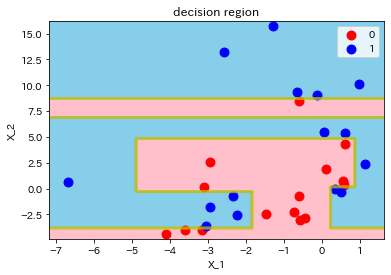

In [15]:
decision_region(X_train, y_train, dtc)

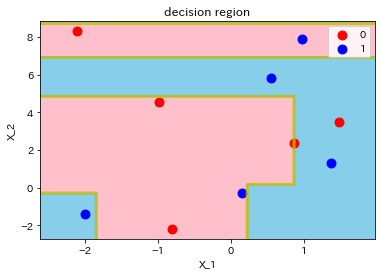

In [16]:
decision_region(X_val, y_val, dtc)

## スクラッチの決定木の可視化

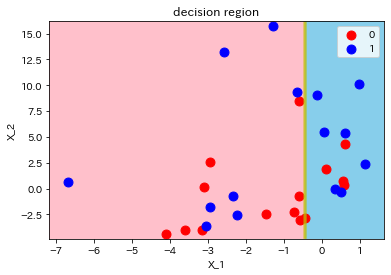

In [17]:
decision_region(X_train, y_train, scr_dtc)

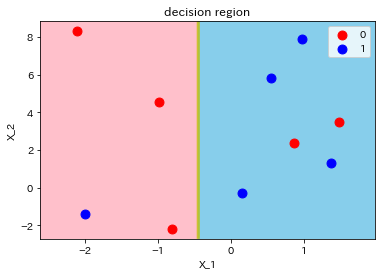

In [18]:
decision_region(X_val, y_val, scr_dtc)

# 【問題7】（アドバンス課題）深さ2の決定木分類器クラスの作成

In [19]:
class ScratchDecesionTreeClassifierDepth2():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False, depth=2):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.layers = {}
        for i in range(2**depth - 1):
            self.layers[str(i)] = ScratchDecesionTreeClassifierDepth1()
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        X_left_0, X_right_0, y_left_0, y_right_0 = self.layers['0'].fit(X, y)
        X_left_1, X_right_1, y_left_1, y_right_1 = self.layers['1'].fit(X_left_0, y_left_0)
        X_left_2, X_right_2, y_left_2, y_right_2 = self.layers['2'].fit(X_right_0, y_right_0)
        
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        y_pred = np.zeros(X.shape[0])
        #n_sample = X.shape[0]
        #X_index = np.arange(n_sample).reshape(-1, 1)
        #X = np.concatenate([X, X_index], axis=1)
        X_left_0, X_right_0, left_index_0, right_index_0 = self._sort(X, self.layers['0'].selected_feature, self.layers['0'].threshold)
        X_left_1, X_right_1, left_index_1, right_index_1 = self._sort(X_left_0, self.layers['1'].selected_feature, self.layers['1'].threshold)
        X_left_2, X_right_2, left_index_2, right_index_2 = self._sort(X_right_0, self.layers['2'].selected_feature, self.layers['2'].threshold)
        
        y_pred[left_index_0[left_index_1]] = self.layers['1'].left_y_label
        y_pred[left_index_0[right_index_1]] = self.layers['1'].right_y_label
        y_pred[right_index_0[left_index_2]] = self.layers['2'].left_y_label
        y_pred[right_index_0[right_index_2]] = self.layers['2'].right_y_label
        
        return y_pred
    
    def _divide(self, X, y, feature, threshold):
        left_index = X[:, feature] >= threshold
        right_index = X[:, feature] < threshold
        X_left = X[left_index]
        X_right = X[right_index]
        y_left = y[left_index]
        y_right = y[right_index]
        
        return X_left, X_right, y_left, y_right
    
    def _sort(self, X, feature, threshold):
        left_index = np.where(X[:, feature] >= threshold)[0]
        right_index = np.where(X[:, feature] < threshold)[0]
        X_left = X[left_index]
        X_right = X[right_index]

        return X_left, X_right, left_index, right_index

In [20]:
scr_dtc_2 = ScratchDecesionTreeClassifierDepth2()

In [21]:
scr_dtc_2.fit(X_train, y_train)

In [22]:
scr_dtc_2.predict(X_val)

array([1., 0., 1., 0., 0., 1., 1., 1., 0., 1.])

In [23]:
y_train[np.where(scr_dtc_2.layers['1'].right_index)[0]]

array([], dtype=int32)

In [24]:
scr_dtc_2.layers['1'].right_y_label

1

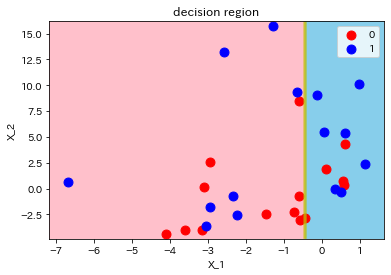

In [25]:
decision_region(X_train, y_train, scr_dtc_2)

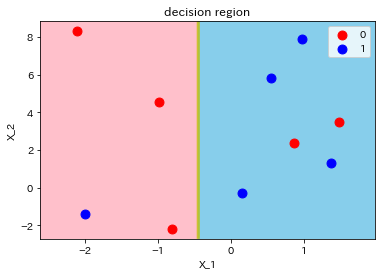

In [26]:
decision_region(X_val, y_val, scr_dtc)

# 【問題8】（アドバンス課題）深さに制限のない決定木分類器クラスの作成

## インターネットで調べたの丸写しです。関数の中でもう一度自分自身の関数を呼び出すのがとてもうまいと思いました。

In [27]:
class DecisionTreeNode():
    def __init__(self, X, y, max_depth):
        self.left = None
        self.right = None
        self.max_depth = max_depth
        self.depth = None
        self.X = X
        self.y = y
        self.threshold = None
        self.feature = None
        self.gini_min = None
        self.label = np.argmax(np.bincount(y))
   
    def split(self, depth):
        self.depth = depth
        self.gini_min, self.threshold, self.feature = self.search_best_split(self.X, self.y)
        print('Depth: {}, Sep at Feature: {},Threshold: {}, Label: {}'.format(self.depth, self.feature, self.threshold, self.label))
       
        if self.depth == self.max_depth or self.gini_min == 0:
            return      
        idx_left = self.X[:, self.feature] >= self.threshold
        idx_right = self.X[:, self.feature] < self.threshold
   
        self.left = DecisionTreeNode(self.X[idx_left],  self.y[idx_left], self.max_depth)
        self.right = DecisionTreeNode(self.X[idx_right], self.y[idx_right], self.max_depth)
        self.left.split(self.depth +1)
        self.right.split(self.depth +1)
 
    def predict(self, X):
        if self.gini_min == 0 or self.depth == self.max_depth:
            return self.label
        else:
            if X[self.feature] > self.threshold:
                return self.left.predict(X)
            else:
                return self.right.predict(X)
            
    def gini_score(self, X, y, feat_idx, threshold):
        gini = 0
        sample_num = len(y)

        div_y = [y[X[:, feat_idx] >= threshold], y[X[:, feat_idx] < threshold]]

        for group in div_y:
            score = 0
            classes = np.unique(group)
            for cls in classes:
                p = np.sum(group == cls)/len(group)
                score += p * p
            gini += (1- score) * (len(group)/sample_num)
        
        return gini
 
    def search_best_split(self, X, y):   
        features = X.shape[1]
        best_thrs = None
        best_f = None
        gini = None
        gini_min = 1

        for feat_idx in range(features):
            values = X[:, feat_idx]
            for val in values:
                gini = self.gini_score(X, y, feat_idx, val)
                if gini_min > gini:
                    gini_min = gini
                    best_thrs = val
                    best_f = feat_idx
                    
        return gini_min, best_thrs, best_f  

In [28]:
 class ScratchDecesionTreeClassifierDepthInf():
    def __init__(self, max_depth):
        self.max_depth = max_depth
   
    def fit(self, X, y):
        initial_depth = 0
        self.tree = DecisionTreeNode(X, y, self.max_depth)
        self.tree.split(initial_depth)
   
    def predict(self, X):
        pred = []
        for s in X:
            pred.append(self.tree.predict(s))
        return np.array(pred)

In [29]:
scr_dtc_inf = ScratchDecesionTreeClassifierDepthInf(max_depth=50)

In [30]:
scr_dtc_inf.fit(X_train, y_train)

Depth: 0, Sep at Feature: 1,Threshold: 5.3524, Label: 0
Depth: 1, Sep at Feature: 1,Threshold: 9.0162, Label: 1
Depth: 2, Sep at Feature: 0,Threshold: -0.12243, Label: 1
Depth: 2, Sep at Feature: 0,Threshold: 0.057313, Label: 1
Depth: 1, Sep at Feature: 1,Threshold: -3.6461, Label: 0
Depth: 2, Sep at Feature: 0,Threshold: -1.4621, Label: 0
Depth: 3, Sep at Feature: 0,Threshold: 0.35084, Label: 0
Depth: 4, Sep at Feature: 0,Threshold: 0.56421, Label: 0
Depth: 5, Sep at Feature: 0,Threshold: 1.1319, Label: 0
Depth: 5, Sep at Feature: 0,Threshold: 0.50214, Label: 1
Depth: 4, Sep at Feature: 0,Threshold: 0.10645, Label: 0
Depth: 3, Sep at Feature: 1,Threshold: 0.15394, Label: 1
Depth: 4, Sep at Feature: 0,Threshold: -3.1108, Label: 0
Depth: 4, Sep at Feature: 0,Threshold: -2.9452, Label: 1
Depth: 2, Sep at Feature: 0,Threshold: -3.1625, Label: 0


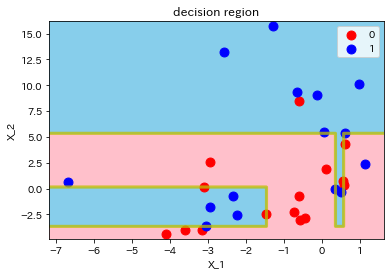

In [31]:
decision_region(X_train, y_train, scr_dtc_inf)

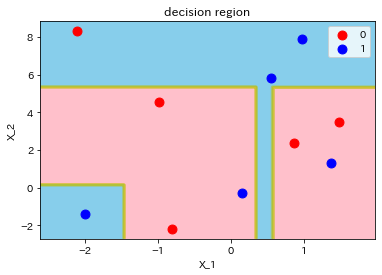

In [32]:
decision_region(X_val, y_val, scr_dtc_inf)